In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Topic: 1. Data preprocessing(dealing with missing data) 2.Multivariate linear regression

In [8]:
file_path = r"C:\Users\LENOVO YOGA X380\Desktop\ML\homeprices1.csv"
df = pd.read_csv(file_path)
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


In [13]:
# fill missing values with median of the 'bedrooms' column
median_bedrooms =  df.bedrooms.median()
import math
median_floor = math.floor(median_bedrooms) # converting to integer
df.bedrooms = df.bedrooms.fillna(median_floor)
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [16]:
# create linear regression model and train it on the data
mod = LinearRegression()
X = df[['area','bedrooms','age']]
y = df.price
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)


[  112.06244194 23388.88007794 -3231.71790863]
221323.0018654043


In [ ]:
# predict for a house with the following features:
# area = 3000 sqft, bedrooms = 3, age = 40 years
mod.predict([[3000,3,40]])

c:\Users\LENOVO YOGA X380\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

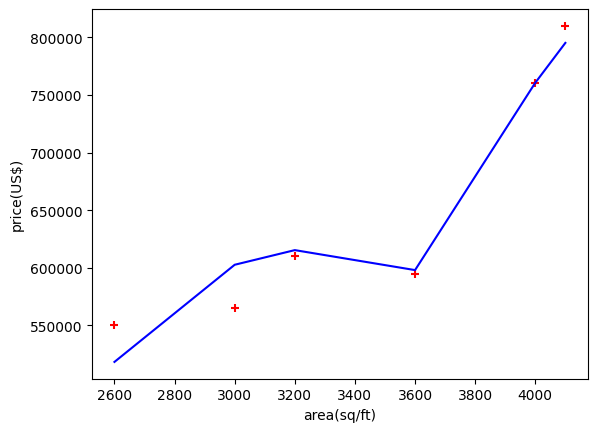

In [ ]:
# Let's visualize the data and the regression line
%matplotlib inline
plt.xlabel("area(sq/ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,mod.predict(df[['area','bedrooms','age']]),color='blue')

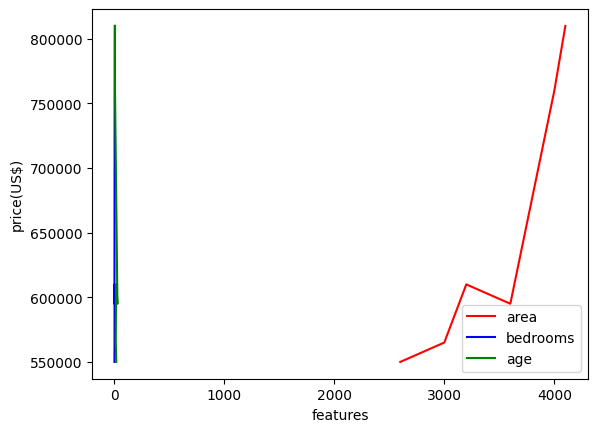

In [ ]:
%matplotlib inline
# create the line graphs of all the features against price
plt.xlabel('features')
plt.ylabel('price(US$)')
plt.plot(df.area,df.price,color='red',label='area')
plt.plot(df.bedrooms,df.price,color='blue',label='bedrooms')
plt.plot(df.age,df.price,color='green',label='age')
plt.legend()

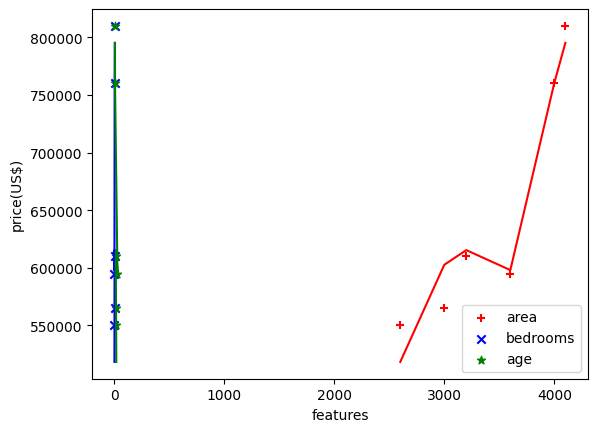

In [ ]:
# create a scatter plot of all the features against price and draw their lines through it 
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+',label='area')
plt.scatter(df.bedrooms,df.price,color='blue',marker='x',label='bedrooms')
plt.scatter(df.age,df.price,color='green',marker='*',label='age')
plt.plot(df.area,mod.predict(df[['area','bedrooms','age']]),color='red')
plt.plot(df.bedrooms,mod.predict(df[['area','bedrooms','age']]),color='blue')
plt.plot(df.age,mod.predict(df[['area','bedrooms','age']]),color='green')
plt.legend()

(array([2., 1., 2., 0., 1.]),
 array([ 8. , 12.4, 16.8, 21.2, 25.6, 30. ]),
 <BarContainer object of 5 artists>)

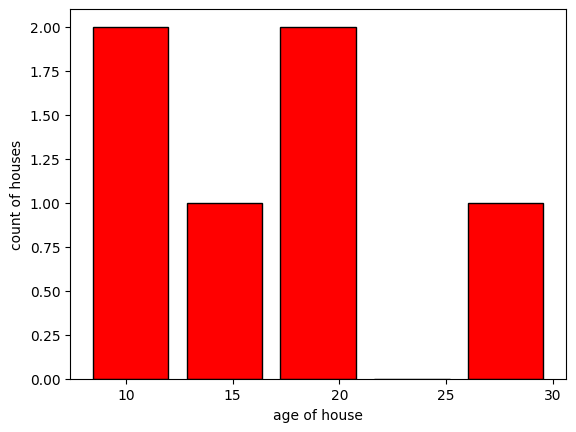

In [ ]:
# let's create a normal distribution of the data with histogram
%matplotlib inline
plt.xlabel("age of house")
plt.ylabel('count of houses')
plt.hist(df.age,bins=5,rwidth=0.8,color='red',edgecolor='black')